<a href="https://colab.research.google.com/github/olmagra/CreditCardFraudDetection-/blob/main/CreditCardFraudDetectionOptimizedModelsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection | Proyecto 2 - Parte 1 (base)**

INFORMACIÓN SOBRE EL DATASET:

1) Fuente de datos

Tomado de: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

2) Breve descripción de datos

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las funciones originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

Dada la relación de desequilibrio de clase, recomendamos medir la precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.

3) ¿Cuál es el objetivo?

Detectar si una transacción de tarjeta de crédito es fraude o no.

4) ¿Este es un problema de clasificación o regresión?

Clasificación binaria: la característica 'Class' toma valor 1 en caso de fraude y 0 en caso contrario.

5) ¿Cuántas características hay? 31

6) ¿Cuántas filas hay?
284.808 (incluida la fila de encabezado)

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

- Es de alta dimensionalidad (una alta cantidad de columnas que fueron tratadas con ACP).
- Es una base de datos desbalanceada, lo que implica que se debe seleccionar cuidadosamente los indicadores para medir su desempeño.
- La mayoría de columnas no tiene nombre por confidencialidad, de modo que será retador concluir si un dato está bueno o malo.
- Es una base de datos muy grande.

## **A | IMPORTAR BIBLIOTECAS Y CARGAR DATOS**

In [ ]:
#Importar biblioteca necesarias
import pandas as pd #Pandas
import numpy as np #Numpy

import matplotlib.pyplot as plt #Importar librería para gráficos Matplotlib
import seaborn as sns #Importar librería para gráficos Seaborn

from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Escalar - estandarizar los datos numéricos
from sklearn.cluster import KMeans #Importar modelo Kmeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score #Medición del modelo a través de silueta
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.tree import DecisionTreeClassifier #Importar la biblioteca para modelo DecisionTree
from sklearn.linear_model import LogisticRegression #Importar modelo regresión logística
from sklearn.neighbors import KNeighborsClassifier #Importar biblioteca modelo KNN
from sklearn.svm import SVC #Importar modelo SVM (Support Vector Machines)
from sklearn.model_selection import cross_val_score #Importar biblioteca croos val score

from sklearn.metrics import recall_score #Importar biblioteca para medir Recall
from sklearn.metrics import classification_report #Importar biblioteca reporte de clasificación
from sklearn.metrics import accuracy_score #Métrica con Score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, RocCurveDisplay #Curva ROC para medir desempeño modelo
from sklearn.metrics import precision_recall_curve #Medir modelo con curva precision recall

from sklearn.utils import resample #Importar técnica de Submuestreo Aleatorio (Random Undersampling)


In [ ]:
#Activar Google Drive para poder cargar archivos de allí
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# => Código tomado de notas de clase y ejercicios
#Cargo el archivo de datos del exámen en Drive (código tomado de notas de clase y ejercicios)
#Creo el DataFrame con el archivo de Excel cargado:
df = pd.read_csv('/content/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **B | EXPLORACIÓN Y LIMPIEZA DE DATOS**

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Número de filas y columnas del dataset:
df.shape

(284807, 31)

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Información del data set
df.info

# Conclusiones iniciales:
#- Es una base de datos limpia, en primera instancia no tiene nulos.
#- Por la descripción de los datos, no hay mucho que concluir sobre las características porque a su vez son el resultado de un proceso PCA.
#- No se debe hacer PCA porque ya fue realizado.

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Examinar el número de valores únicos en cada columna:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
#=> Código tomado del cuaderno de notas de clase Coding Dojo:
# Estadísticas principales del dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Buscar y remover duplicados
df.duplicated().sum()

1081

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Remover los duplicados y chequear si queda alguno
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Remover columna innecesaria: time. En realidad no es tiempo, es un número. No aporta al modelo.
df = df.drop(columns=['Time'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Revisar los valores de la columna objetivo:
df['Class'].value_counts()

# Efectivamente coincide con la descripción del dataset

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=-2r_T6YzB3pW
# Aunque ya vimos que no hay campos con valores nulos, es bueno revisar:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Encontrar los nombres de clase y determinar cómo están balanceadas
# Al usar normalize = True con value_counts, nuestra salida es el porcentaje de cada clase (escrito como decimal)
df['Class'].value_counts(normalize = True)

# Se concluye que el conjunto de datos no está balanceado como se espera debido lo ideal
# es que las transacciones fraudulentas (valor 1) sean las menos posibles

0    0.998333
1    0.001667
Name: Class, dtype: float64

# **C | VISUALIZAR LOS DATOS**

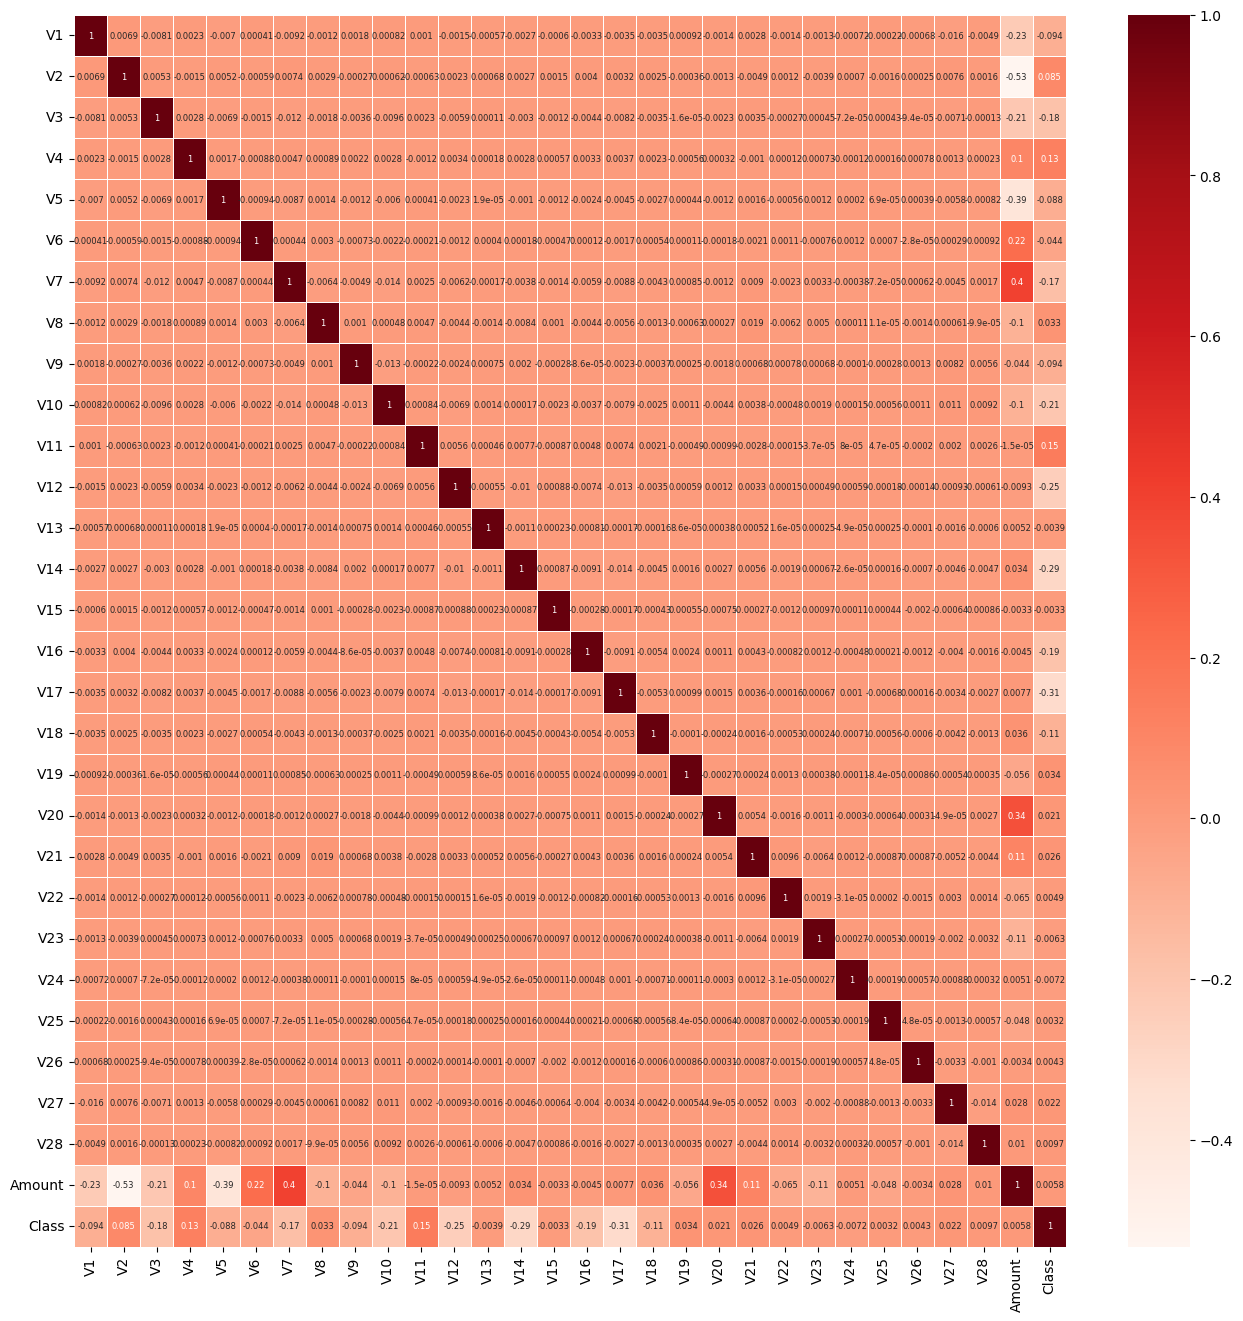

In [ ]:
#Código tomado de Coding Dojo: Correlación y mapas de calor
# Mapa de calor de las correlaciones para identificar cualquier característica
# que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el peso

plt.figure(figsize=(16, 16)) #Establecer el tamaño de la figura
corr = df.corr() #Calcular los coeficientes de correlación entre las características del DataFrame
sns.heatmap(corr, annot = True, cmap = "Reds", annot_kws={"size":6}, linewidths = 0.5, linecolor = "white"); #Visualizar los coeficientes de relación mediante un mapa de calor

In [ ]:
# Al ver este gráfico de correlaciones las conclusiones son:
#- Las cono se encuentran muchas correlaciones.
#- COn respecto a la variable objetivo 'Class' la mayor correlación es con la V11 (es débil).
#- Con la variable 'Amount' (supongo que es el monto en valor para el fraude) las correlaciones más altas (es media) están con V7, V20 y V6 (en ese orden).
#- Con la variable 'Time' los componentes con mayor correlación (es débil) son V5, V22 y V1.
#- Con las bajas correlaciones el mejor modelo por usar es uno de árboles.

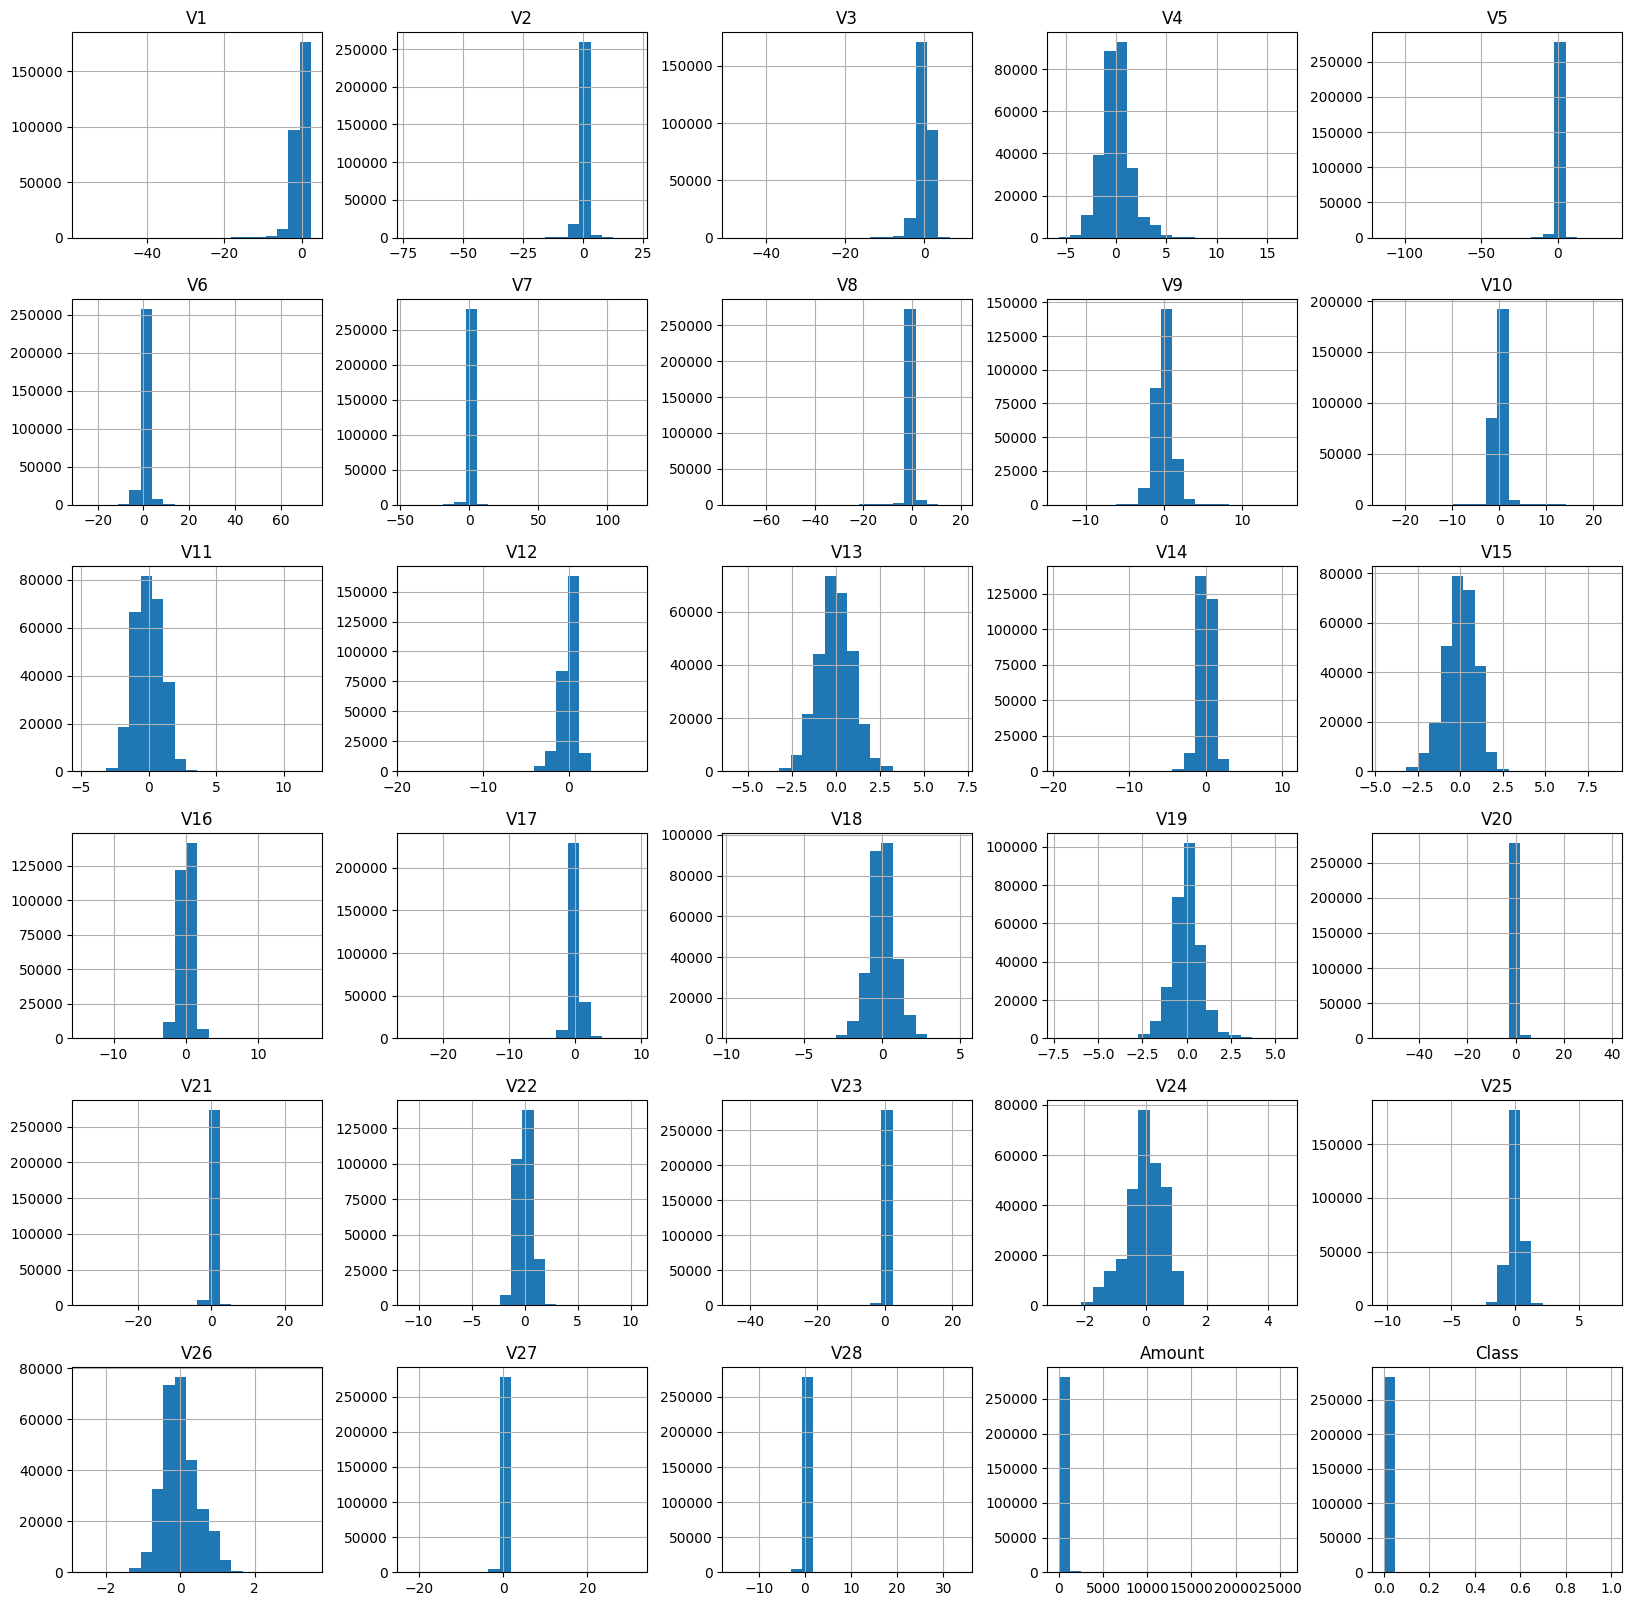

In [ ]:
#=> Código tomado de https://www.kaggle.com/code/harshghadiya/clustering-on-wine-quality-3-different-clusters
# Visualizar los datos de cada variable:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

# **D | PREPARAR LOS DATOS PARA EL MODELO Y SEPARAR EN MATRIZ DE CARACTERÍSTICAS X & DE OBJETIVO Y**

In [ ]:
# Ordenar los datos en matriz de características X & vector objetivo y
y = df['Class']
print('Filas y columnas de y:', y.shape)

X = df.drop(columns = 'Class', axis=1)
print('Filas y columnas de X:', X.shape)

# Código tomado de lección Coding Dojo 'Árboles de clasificación en Python': https://login.codingdojo.com/m/503/12408/86782
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Realizar un train test split (modelo de validación)

Filas y columnas de y: (283726,)
Filas y columnas de X: (283726, 29)


In [ ]:
# Entender qué tipos de columnas hay:

# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# seleccionen las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

# comprueben las listas
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
categorical columns are []


Se concluye que todo el dataset está conformado por columnas numéricas. No hay ninguna categórica, por lo tanto no tendré que usar one hot encoder.

Escalar:  Por lo que se puede visualizar los datos ya están escalados. Llegué a esta conclusión porque están en númueros pequeños y en cada característica hay positivos y negativos. Por esa razón decido no escalarlos.

No es necesario hacer PCA porque en la descripción del dataset indican que ya está hecho.

# **E | ENCONTRAR EL MEJOR MODELO DE MACHINE LEARNING PARA ESTE PROBLEMA**

**E.1. MODELO DE CLASIFICACIÓN CON ÁRBOLES DE DECISIÓN**

In [ ]:
# Crear el modelo de Árbol de decisión
%%time
modeldt = DecisionTreeClassifier(random_state = 42, max_depth=2)


# Entrenar el modelo con el conjunto de datos de entrenamiento
modeldt.fit(X_train, y_train)

# Hacer las predicciones en el conjunto de datos de prueba
y_pred = modeldt.predict(X_test)

# Evaluar el modelo
# Teniendo en cuenta que es un data set desbalanceado y que es un problema de clasificación binaria
# se medirá el desempeño a través de los 3 indicadores que presenta el reporte de clasificación: Precision, Recall, f1.

# El indicador que tomo como referencia es Recalll y Precision para la clase 1

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, modeldt.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, modeldt.predict_proba(X_test)[:,1])}')


# Calculando la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, modeldt.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.81      0.68      0.74       134

    accuracy                           1.00     85118
   macro avg       0.91      0.84      0.87     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.884806294942908
Testing AUC: 0.8543213489879043
CPU times: user 2.71 s, sys: 27.8 ms, total: 2.74 s
Wall time: 2.74 s


**E.2. MODELO DE CLASIFICACIÓN CON ÁRBOLES DE DECISIÓN CON HIPERMARÁMETROS MEJORADOS**

In [ ]:
# Código tomado de clases y ayudantías de Coding Dojo
# Buscando mejorar el desempeño del modelo, se requiere ecnontrar la profundidad del árbol de decisión que genere el mejor score:
%%time
max_depth_range_dt = list(range(2, 6)) # Evalúa un rango de profundidad para el árbol entre 2 y 20

score_dt = [] #Crea una lista que almacena la puntuación para cada valor de max_depth:
for depth in max_depth_range_dt:
    bestdt = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    bestdt.fit(X_train, y_train)
    score = bestdt.score(X_test, y_test)
    score_dt.append(score)

# Buscar el score más alto:
for i in range(len(score_dt)):
    if (score_dt[i]==max(score_dt)):
        break
print("Profundidad Árbol Decisión con mejor score",max_depth_range_dt[i])

Profundidad Árbol Decisión con mejor score 5
CPU times: user 17.9 s, sys: 2.36 ms, total: 18 s
Wall time: 18 s


In [ ]:
# Repito el modelo de Árbol de decisión con la profundidad recalibrada:

#from sklearn.tree import DecisionTreeClassifier #Importar la biblioteca para modelo DecisionTree

# Crear el modelo de Árbol de decisión
%%time
modeldt = DecisionTreeClassifier(random_state = 42, max_depth=5)

# Entrenar el modelo con el conjunto de datos de entrenamiento
modeldt.fit(X_train, y_train)

# Hacer las predicciones en el conjunto de datos de prueba
y_pred = modeldt.predict(X_test)

# Evaluar el modelo
# Teniendo en cuenta que es un data set desbalanceado y que es un problema de clasificación binaria
# se medirá el desempeño a través de los 3 indicadores que presenta el reporte de clasificación: Precision, Recall, f1.

# El indicador que tomo como referencia es Recalll y Precision para la clase 1

#from sklearn.metrics import recall_score #Importar biblioteca para medir Recall
#from sklearn.metrics import classification_report #Importar biblioteca reporte de clasificación

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, modeldt.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, modeldt.predict_proba(X_test)[:,1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.77      0.83       134

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.924693636402414
Testing AUC: 0.8878809145461621
CPU times: user 7.18 s, sys: 0 ns, total: 7.18 s
Wall time: 7.26 s


**E.3. MODELO KNN VECINOS MÁS CERCANOS**

In [ ]:
#=> Código tomado de lección Coding Dojo 'KNN vecinos más cercanos usando Python': https://login.codingdojo.com/m/503/12408/86789

# Instancien el escalador estándar (estandarizar los datos)
#scaler = StandardScaler() #Los datos ya están escalados, por eso dejo comentada esta línea

# Crear el modelo usando KNN
%%time
modelknn = KNeighborsClassifier(n_neighbors=3)

# Establecer scaler y el modelo en un pipeline y ajustar el pipeline en los datos de entrenamiento:
knn_pipe = make_pipeline(modelknn)
knn_pipe.fit(X_train, y_train)

# Entrenar el modelo con el conjunto de datos de entrenamiento:
knn_pipe.fit(X_train, y_train)

# Hacer las predicciones en el conjunto de datos de prueba:
y_pred = knn_pipe.predict(X_test)

# Evaluar el modelo
# Teniendo en cuenta que es un data set desbalanceado y que es un problema de clasificación binaria
# se medirá el desempeño a través de los 3 indicadores que presenta el reporte de clasificación: Precision, Recall, f1.

# El indicador que tomo como referencia es Recalll y Precision para la clase 1

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, knn_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, knn_pipe.predict_proba(X_test)[:,1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.93      0.63      0.76       134

    accuracy                           1.00     85118
   macro avg       0.97      0.82      0.88     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.999932676905639
Testing AUC: 0.8580763139259927
CPU times: user 13min 18s, sys: 1.07 s, total: 13min 19s
Wall time: 8min 15s


# **E.4. MODELO KNN VECINOS MÁS CERCANOS CON HIPERPARÁMETROS AJUSTADOS**

In [ ]:
# Ajustar hiperparámetros del modelo KNN:

%%time
from sklearn.model_selection import GridSearchCV #Importar biblioteca para ajustar hyperparámetros en KNN

# Definimos los hyperparámetros a probar
param_grid = {'n_neighbors': [3, 5, 7, 9, 12], 'weights': ['uniform', 'distance']}

# Creamos el modelo de KNN
knn = KNeighborsClassifier()

# Usamos GridSearchCV para probar todos las combinaciones posibles de hyperparámetros
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

# Imprimimos los hyperparámetros ideales
print('El mejor conjunto de hyperparámetros para KNN es:', grid.best_params_)

El mejor conjunto de hyperparámetros para KNN es: {'n_neighbors': 3, 'weights': 'distance'}
CPU times: user 57min 46s, sys: 5.6 s, total: 57min 51s
Wall time: 35min 52s


In [ ]:
#=> Código tomado de lección Coding Dojo 'KNN vecinos más cercanos usando Python': https://login.codingdojo.com/m/503/12408/86789

# Instancien el escalador estándar (estandarizar los datos)
#scaler = StandardScaler() #Los datos ya están escalados, por eso dejo comentada esta línea

# Crear el modelo usando KNN con hiperparámetro ideales
%%time
modelknn = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Establecer scaler y el modelo en un pipeline y ajustar el pipeline en los datos de entrenamiento:
knn_pipe = make_pipeline(modelknn)
knn_pipe.fit(X_train, y_train)

# Entrenar el modelo con el conjunto de datos de entrenamiento:
knn_pipe.fit(X_train, y_train)

# Hacer las predicciones en el conjunto de datos de prueba:
y_pred = knn_pipe.predict(X_test)

# Evaluar el modelo
# Teniendo en cuenta que es un data set desbalanceado y que es un problema de clasificación binaria
# se medirá el desempeño a través de los 3 indicadores que presenta el reporte de clasificación: Precision, Recall, f1.

# El indicador que tomo como referencia es Recalll y Precision para la clase 1

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, knn_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, knn_pipe.predict_proba(X_test)[:,1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.91      0.51      0.65       134

    accuracy                           1.00     85118
   macro avg       0.95      0.75      0.83     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.9997526601586286
Testing AUC: 0.8690902835441544
CPU times: user 13min 23s, sys: 917 ms, total: 13min 24s
Wall time: 8min 17s


**E.5. MODELO REGRESIÓN LOGÍSTICA**

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

# Modelo Regresión logística Sin PCA
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.91      0.51      0.65       134

    accuracy                           1.00     85118
   macro avg       0.95      0.75      0.83     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.9672158698729242
Testing AUC: 0.9580312571567466
CPU times: user 5.86 s, sys: 1.6 s, total: 7.46 s
Wall time: 5.51 s


<Figure size 500x500 with 0 Axes>

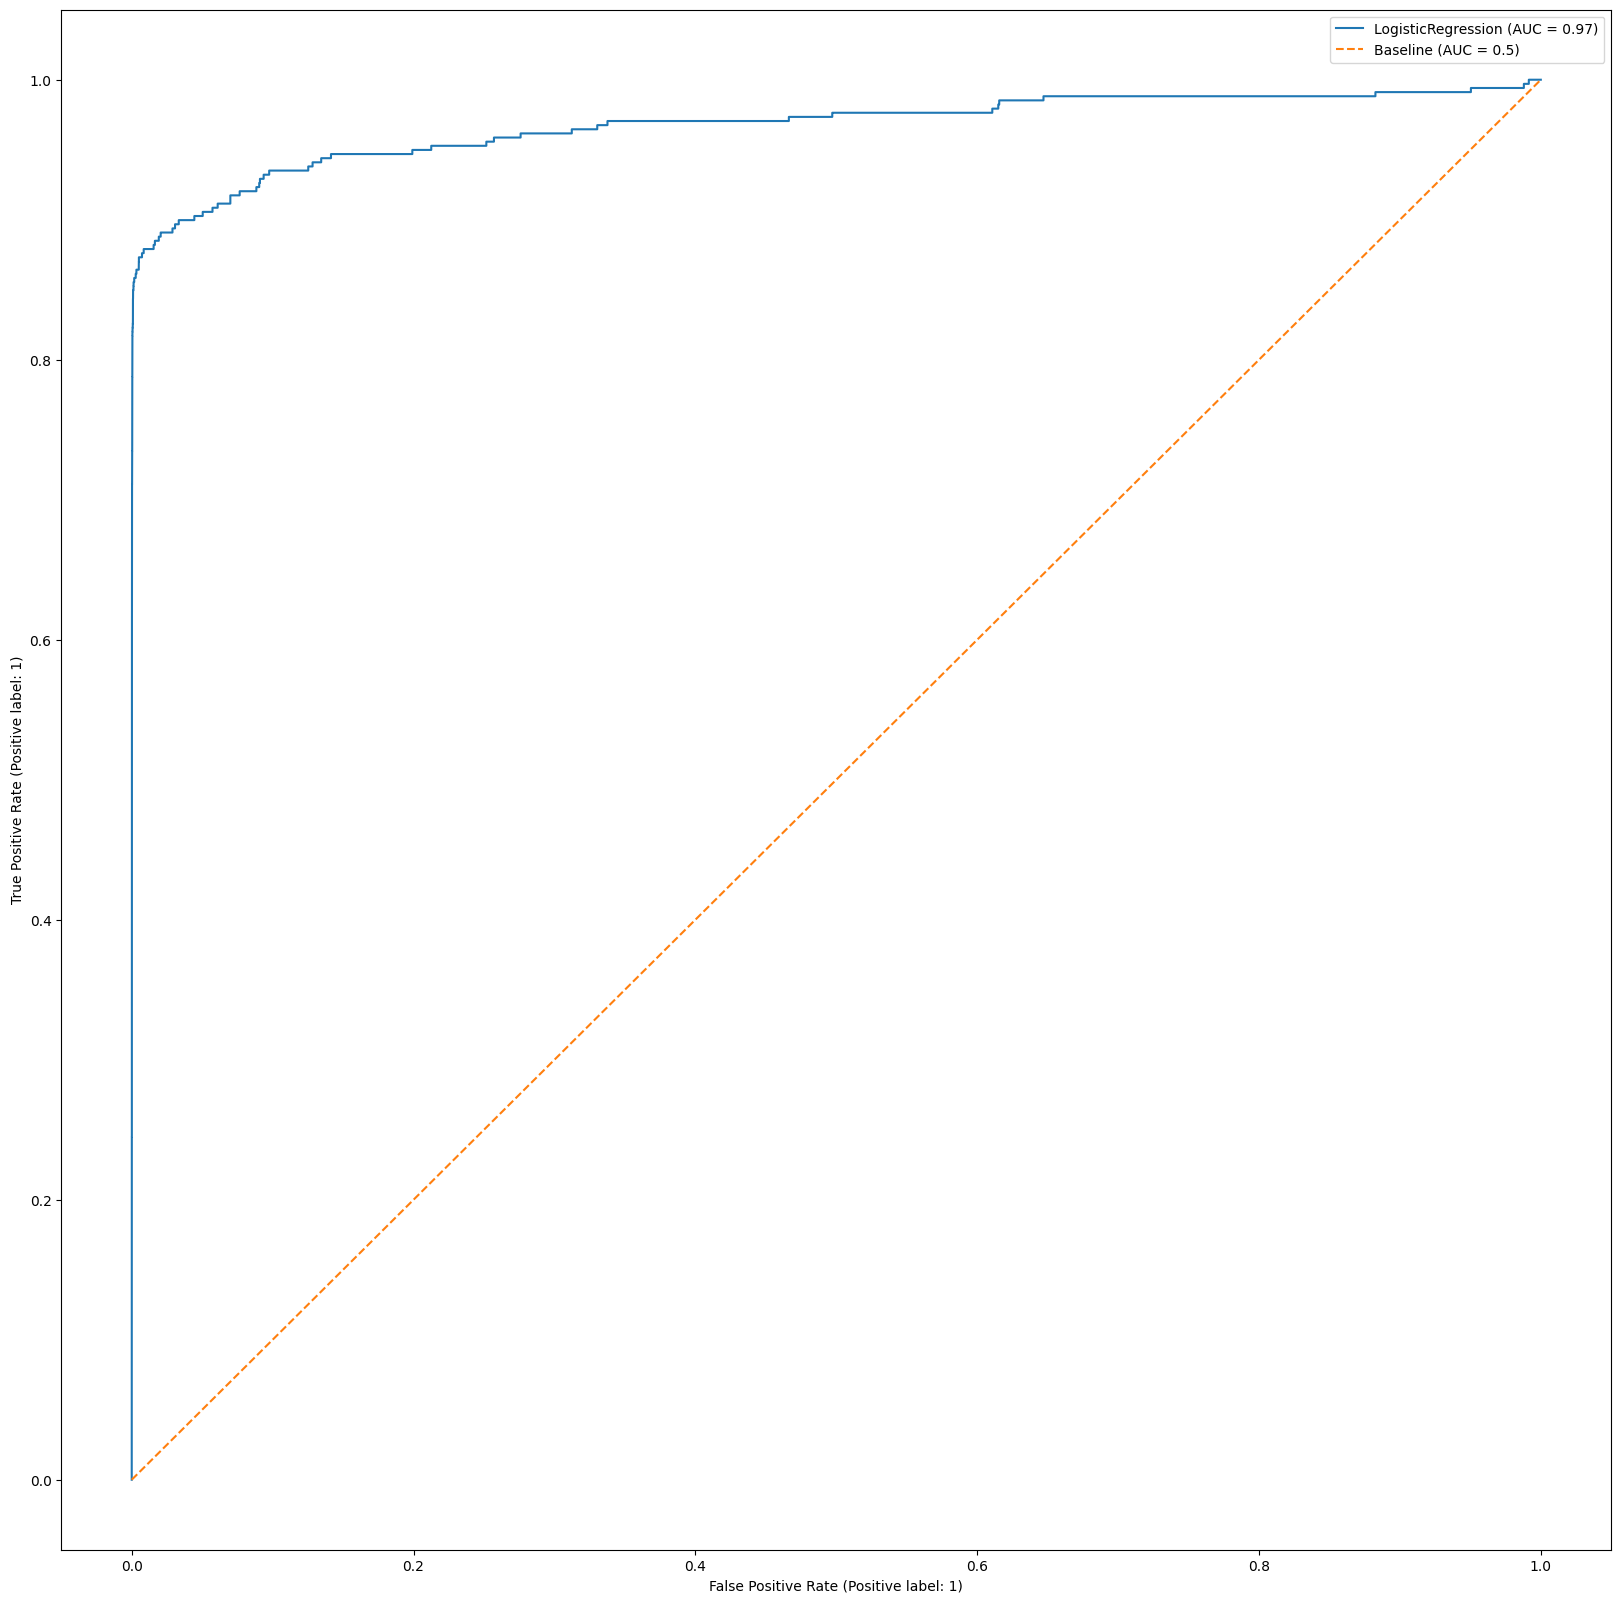

In [ ]:
# Visualize the ROC curve
plt.figure(figsize=(5, 5)) #Establecer el tamaño de la figura
RocCurveDisplay.from_estimator(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();


**E.5. MODELO REGRESIÓN LOGÍSTICA CON HIPERPARÁMETROS AJUSTADOS**

C ideal es 0.1


{0.0001: 0.9984727084752931,
 0.001: 0.9990013863107686,
 0.01: 0.9991188702742075,
 0.1: 0.999177612255927,
 1: 0.9991658638595832,
 10: 0.9991658638595832,
 100: 0.9991658638595832,
 1000: 0.9991658638595832}

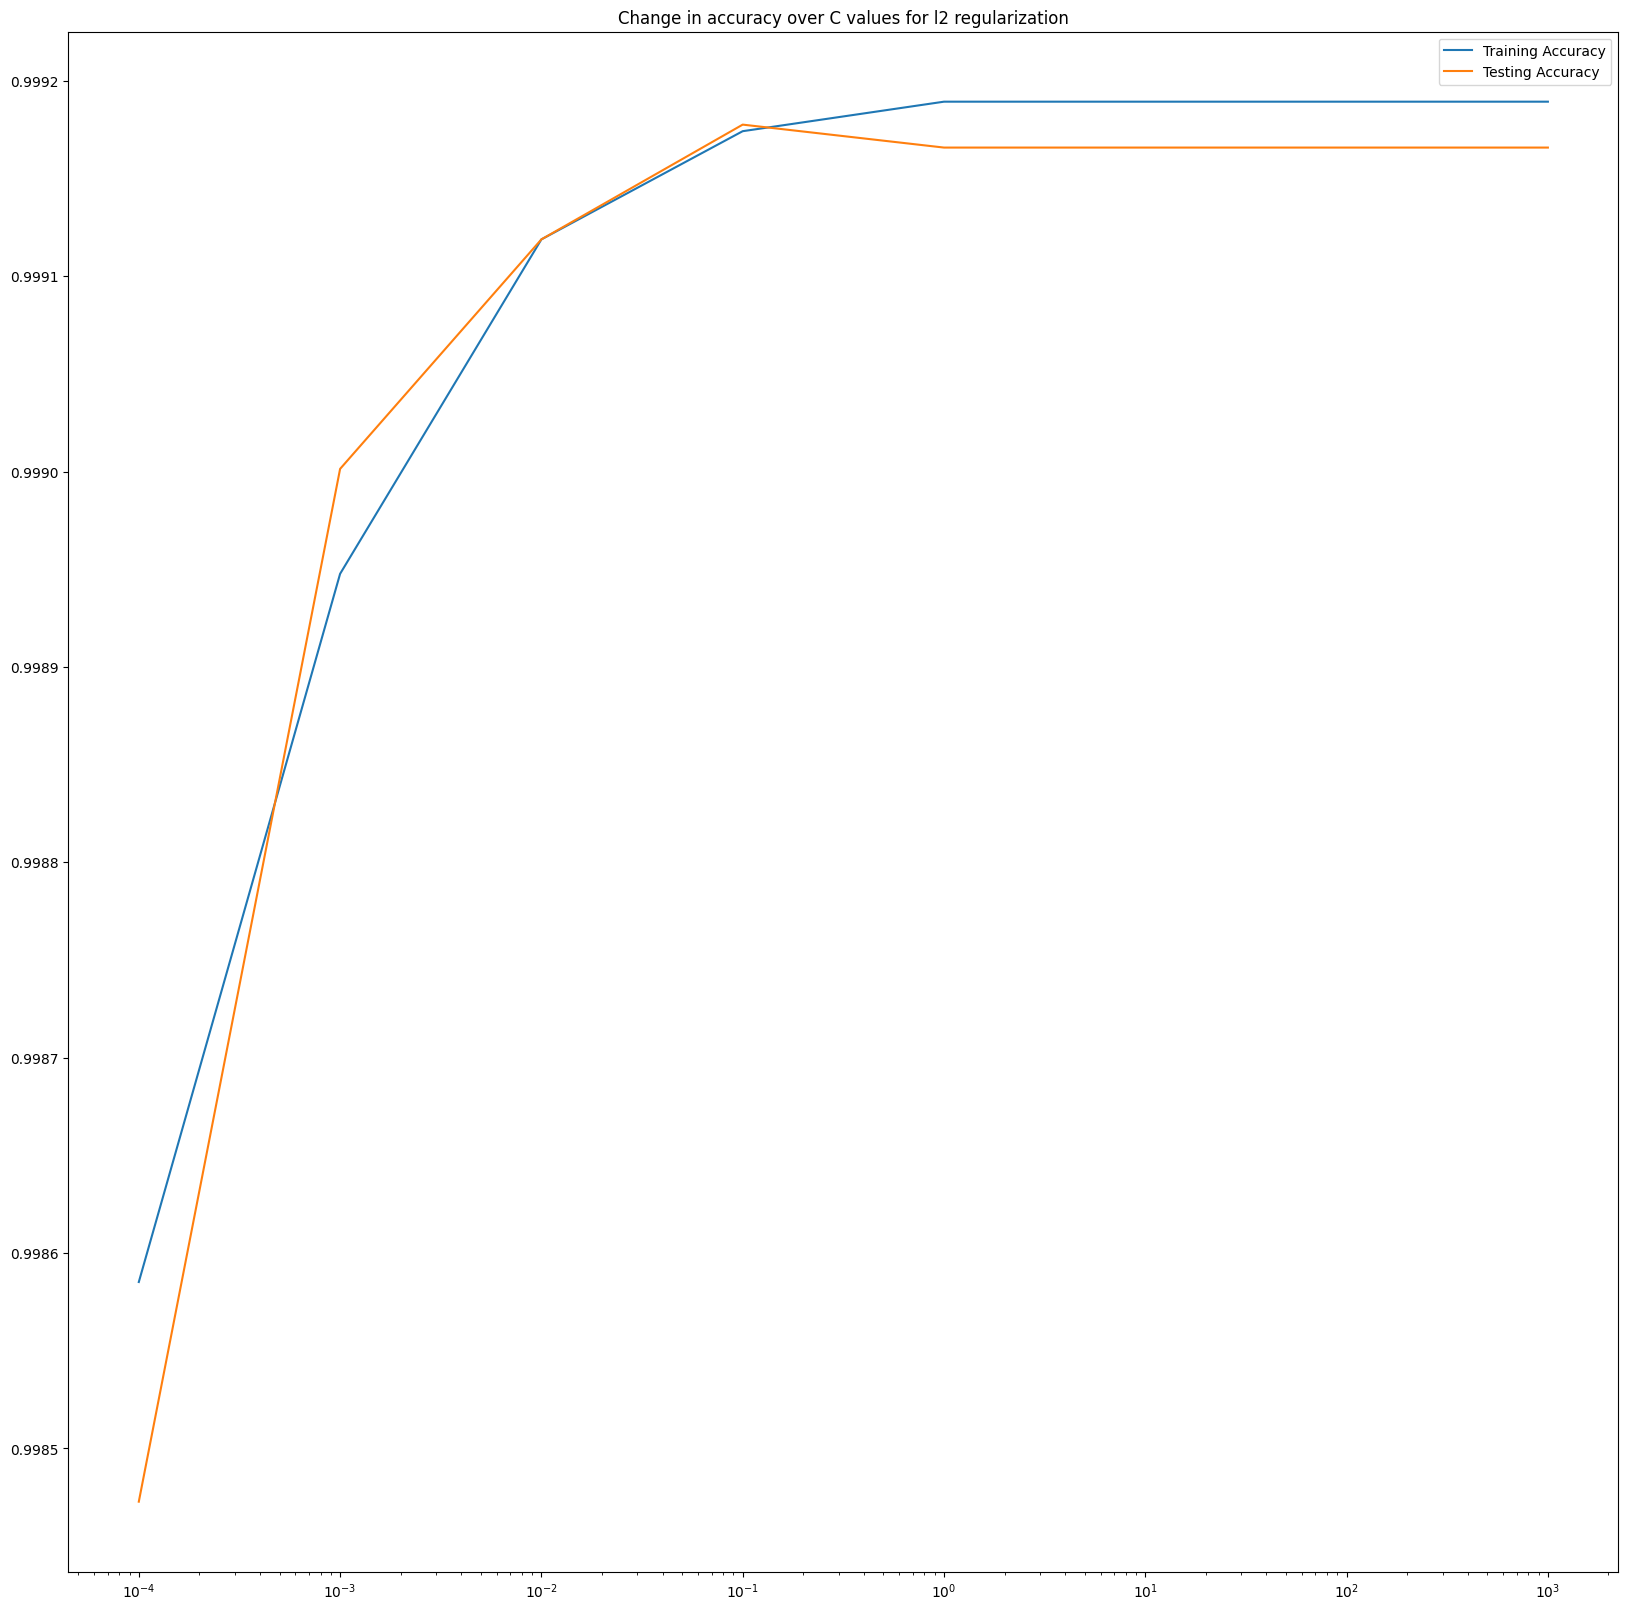

In [ ]:
#Se necesita iterar para hallar el valor ideal del hiperparámetro C

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Crear una lista con los valores de C
train_scores = [] #Crear lista vacía para los puntajes del conjunto de datos de entrenamiento
test_scores = [] #Crear lista vacía para los puntajes del conjunto de datos de prueba

# Iterar sobr elos valores de C
for c in c_values:
  # Intanciar el modelo con cada valor de C y entrenarlo en la data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg.fit(X_train, y_train)
 
  # Adicionar los score obtenidos a las listas de scores
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))

  # Buscamos el mejor test_scores:
for i in range(len(test_scores)):
    if (test_scores[i]==max(test_scores)):
        break
print("C ideal es",c_values[i])
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [ ]:
#=> Código tomado de la lección de Coding Dojo 'Introducción a la regresión logística': https://login.codingdojo.com/m/503/12408/86791

# Repito el modelo de Regresión logíistica con el hiperparámetro C ajustado a 100

# Instanciar el modelo de regresión logística:
logreg = LogisticRegression(C = 0.1)

# Instanciar el escalador para estandarizar los datos:
#scaler = StandardScaler()

# Crear un pipeline con el escalador y el modelo:
logreg_pipe = make_pipeline(logreg)

# Entrenar el modelo en la data y guardar la información aprendida
# El modelo está aprendiendo la relación entre X & y 
logreg.fit(X_train,y_train)

# Evaluar el modelo
# Teniendo en cuenta que es un data set desbalanceado y que es un problema de clasificación binaria
# se medirá el desempeño a través de los 3 indicadores que presenta el reporte de clasificación: Precision, Recall, f1.

# El indicador que tomo como referencia es Recalll y Precision para la clase 1


print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.91      0.51      0.65       134

    accuracy                           1.00     85118
   macro avg       0.95      0.75      0.83     85118
weighted avg       1.00      1.00      1.00     85118

Training AUC: 0.9571779741866444
Testing AUC: 0.9497524380357462


**E.6. MODELO SVC CON BALANCE DE DATA SET**

Fuente de consulta: https://oa.upm.es/67976/1/TFG_ISMAEL_CALVO_PEREZ.pdf#page=62&zoom=100,113,516

In [ ]:
%%time
# Balancear el dataset:
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0].sample(n=len(fraud))

df_balanceado = pd.concat([fraud, not_fraud])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_balanceado.drop('Class', axis=1), df_balanceado['Class'], test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear', class_weight='balanced', probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate recall score
recall = recall_score(y_test, y_pred)

# Print recall score
print('Recall score modelo SVC:', recall)

print(classification_report(y_test, y_pred)) #Revisar el reporte de clasificación para analizar el desempeño del modelo por clase

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, model.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')


Recall score modelo SVC: 0.9318181818181818
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.96      0.93      0.95        88

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

Training AUC: 0.9819021948402002
Testing AUC: 0.9940953654188949
CPU times: user 1min 6s, sys: 133 ms, total: 1min 6s
Wall time: 1min 7s


**CONCLUSIONES**

Las métricas de cada modelo aplicado son:
En el caso de recall: me concentro en el recall de la clase 1 (fraudes), por una razón: para todos los modelos la clase 0 tiene muy buen desempeño, y además considerando que es un dataset muy desbalanceado en el que la clase 1 ocupa menos del 1% de la data.
1.	DecisionTree:
•	Precision - clase 1: 0.81
•	Recall - clase 1: 0.68
•	Training AUC: 0.88
•	Testing AUC: 0.85
2.	DecisionTree con hiperparámetros ajustados:
•	Precision - clase 1: 0.90
•	Recall - clase 1: 0.77
•	Training AUC: 0.92
•	Testing AUC: 0.88
3.	KNN:
•	Precision – clase 1: 0.93 
•	Recall clase 1: 0.63
•	Training AUC: 0.99
•	Testing AUC: 0.85
4.	KNN con hiperparámetros ajustados:
•	Precision – clase 1: 0.91
•	Recall - clase 1: 0.61
•	Training AUC: 0.99
•	Testing AUC: 0.86
5.	Regresión logística:
•	Precision – clase1: 0.91
•	Recall - clase 1: 0.51
•	Training AUC: 0.96
•	Testing AUC: 0.95
6.	Regresión logística con hiperparámetros ajustados:
•	Precision - clase 1: 0.91
•	Recall Clase 1: 0.51
•	Training AUC: 0.95
•	Testing AUC: 0.94
7.	SVC con undersampling y balanceado:
•	Precision – clase 1: 0.96
•	Recall – clase 1: 0.93
•	Training AUC: 0.98
•	Testing AUC: 0.99

___________________________________________
Según estos resultados creo que el mejor modelo es SVC por que es el que mejor Precision y Recall saca para la clase 1 y porque también presenta un muy buen desempeño en la curva ROC, tanto para los datos de entrenamiento como los de prueba.